# Linear Regression

### This file is a setup and explanitory notes for Linear Regression Models:

Linear regression is a basic ML model used to predict numeric values

### Setup and imports for Linear Regresson

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

## Data 

Data used as an example for this Linear Regression model

In [3]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data
y_train = dftrain.pop('survived') # Pop takes out the "survived" column of the dataset
y_eval = dfeval.pop('survived')

In [4]:
# Shows the first 5 elements of the dataset

dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [5]:
# Statistical analysis of the dataset

dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [6]:
# The shape of the dataset:

dftrain.shape

(627, 9)

In [7]:
# Showing the training set
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

<Axes: >

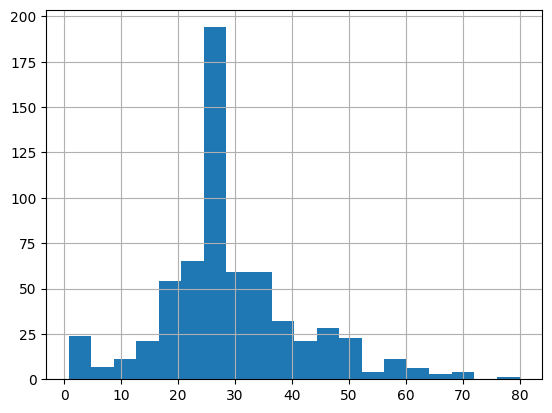

In [8]:
# Showing the dataspread of the age of passengers

dftrain.age.hist(bins=20)

#Histogram shows the majority of passangers are between 20 and 30 years old

<Axes: ylabel='sex'>

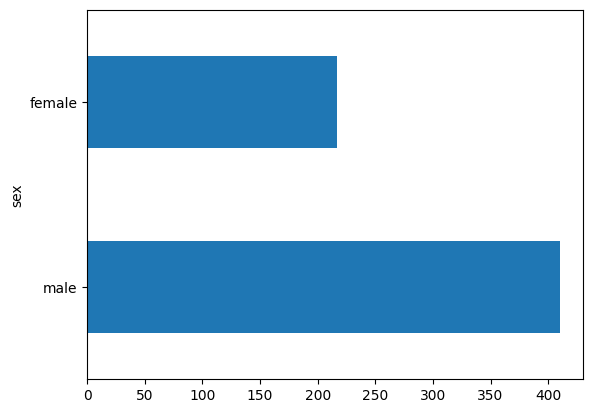

In [9]:
# Plotting the amount per sex

dftrain.sex.value_counts().plot(kind='barh')

<Axes: ylabel='class'>

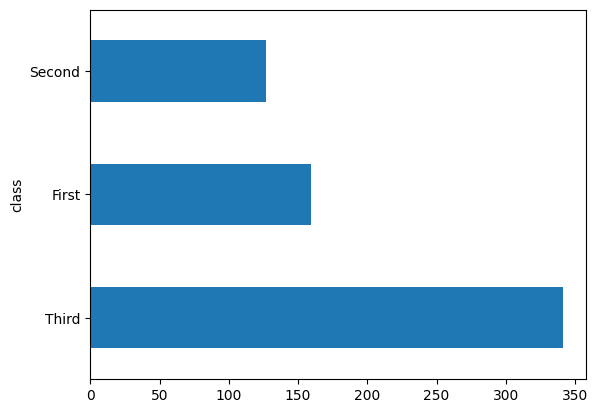

In [10]:
# Plotting the amount per class

dftrain['class'].value_counts().plot(kind='barh')

Text(0.5, 0, '% survive')

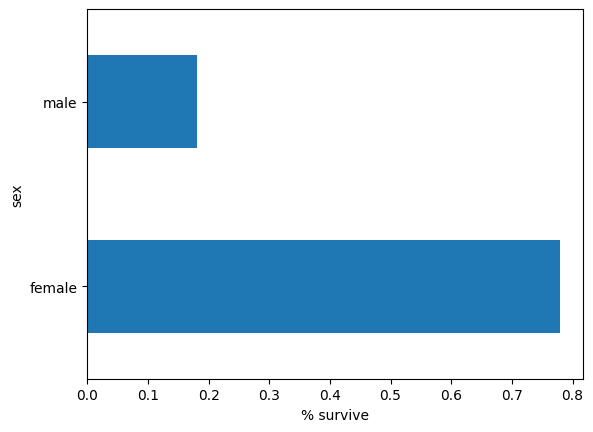

In [11]:
# Showing the percentage survival per sex

pd.concat([dftrain,y_train],axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')

# Training and Testing Data

The training data is what we feed to the model so that it can develop and learn. It is usually a much larger size than the testing data.

The testing data is what we use to evaulate the model and see how well it is performing. We must use a seperate set of data that the model has not been trained on to evaluate it.

### Feature Columns

There are two sets of columns: **Cateforical and Numeric**

*Categorical* data is anything that is not numeric (like sex, male/female)
Can work around this by encoding a category with an integer

In [12]:
from tensorflow import keras
from tensorflow.keras import layers


In [13]:
# One-hot encode categorical variables
#Converts categorical columns (like sex, class, etc.) into numeric format using one-hot encoding, which is required for Keras models.
dftrain_encoded = pd.get_dummies(dftrain)
dfeval_encoded = pd.get_dummies(dfeval)

In [14]:
#Ensures both training and evaluation datasets have the same columns, even if some categories are missing in one of them.
# Align columns in case of mismatched categories
dftrain_encoded, dfeval_encoded = dftrain_encoded.align(dfeval_encoded, join='left', axis=1, fill_value=0)


In [15]:
# Creates a simple linear model with one output neuron and a sigmoid activation (for binary classification).
# Build the model
model = keras.Sequential([
    layers.Dense(1, activation='sigmoid', input_shape=(dftrain_encoded.shape[1],))
])


C:\Users\mala13511\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
# Prepares the model for training by specifying the optimizer, loss function, and evaluation metric.
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [17]:
# Trains the model on the training data for 10 epochs with a batch size of 32.
# Train the model
model.fit(dftrain_encoded, y_train, epochs=10, batch_size=32)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6731 - loss: 3.4656  
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6940 - loss: 3.2283 
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6586 - loss: 3.0357 
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6660 - loss: 3.2342 
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6833 - loss: 3.1240 
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6681 - loss: 2.6564 
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6775 - loss: 2.5011 
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6824 - loss: 2.3367 
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6692 - loss: 2.3292 
Epoch 10/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6515 - loss: 2.4927 


## Evaluate the model

In [18]:
# Evaluate the model
loss, accuracy = model.evaluate(dfeval_encoded, y_eval)
print(f"Evaluation accuracy: {accuracy:.4f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6267 - loss: 1.8906  
Evaluation accuracy: 0.6932


## Predictions

In [19]:
predictions = model.predict(dfeval_encoded)
print(predictions)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
[[2.13272404e-03]
 [3.97512585e-01]
 [8.25923751e-04]
 [1.45440630e-04]
 [9.69083793e-03]
 [1.65681019e-01]
 [9.81475234e-01]
 [6.54351041e-02]
 [6.11612916e-01]
 [6.59648106e-02]
 [7.20853498e-03]
 [6.17705695e-02]
 [9.98976409e-01]
 [5.10376215e-01]
 [1.05280932e-02]
 [9.99819815e-01]
 [4.25545499e-02]
 [3.27632844e-01]
 [2.20436323e-02]
 [9.44435131e-03]
 [7.88557753e-02]
 [3.87754828e-01]
 [6.08271360e-02]
 [9.73278598e-04]
 [1.11247078e-01]
 [9.99736965e-01]
 [9.99998868e-01]
 [9.98083889e-01]
 [3.97680402e-01]
 [9.67682451e-02]
 [1.74917642e-03]
 [4.95094597e-01]
 [1.07377104e-01]
 [1.69139341e-01]
 [9.95245755e-01]
 [1.45290243e-02]
 [9.33625102e-02]
 [1.73553743e-03]
 [9.99990880e-01]
 [7.37631321e-03]
 [5.71621861e-03]
 [9.76947010e-01]
 [5.32754771e-02]
 [5.64280868e-01]
 [1.96378841e-03]
 [9.61754560e-01]
 [6.35782331e-02]
 [1.36747619e-03]
 [9.99930322e-01]
 [9.96970832e-01]
 [2.70749978e-03]
 [3.49225163e-01]
 [4.49380139e-04]
 [6.5896

In [20]:
# Createing a df of predictions, converting it to a value between 0 and 1
prediction_classes =(predictions>0.5).astype(int)
print(prediction_classes)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]


In [21]:
# Creates a comparison dataframe comparing the actual and predicted values
comparison_df = pd.DataFrame({
    'Actual': y_eval.values,
    'Predicted': prediction_classes.flatten()
})
print(comparison_df.head())

   Actual  Predicted
0       0          0
1       0          0
2       1          0
3       1          0
4       1          0


# Plots:

## Confusion Matrix



In [22]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
import numpy as np

## Confusion Matrix

Shows how many passengers were correctly or incorrectly classified as survived or not.

[True Negative, False Positives

False Negatives, True Positives]

In [23]:
#Actual labels
actual_classes = y_eval.values

#Confusion matrix
cm = confusion_matrix(actual_classes, prediction_classes)
print(cm)

[[133  32]
 [ 49  50]]


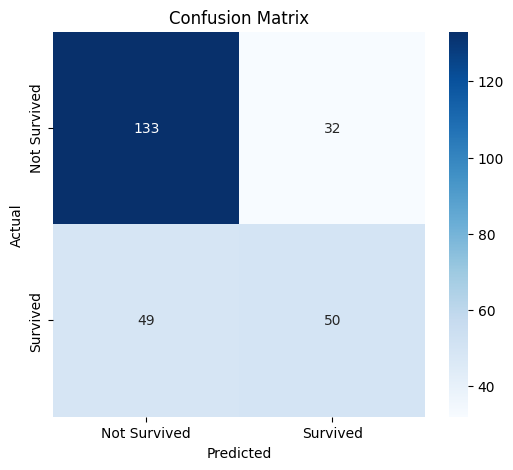

In [31]:
# Shows how many passengers were correctly or incorrectly classified as survived or not.
plt.figure(figsize=(6,5))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',
            xticklabels=['Not Survived','Survived'],
            yticklabels=['Not Survived','Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## ROC Curve

Visualizes the trade-off between sensitivity and specificity. The AUC (Area Under Curve) gives a single score — closer to 1 is better.

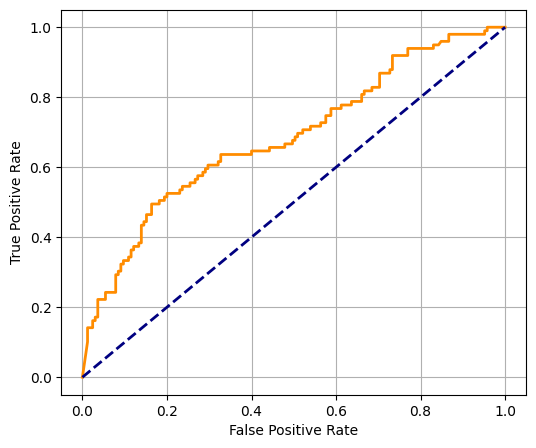

In [32]:
fpr, tpr, thresholds = roc_curve(actual_classes, predictions)
roc_auc = auc(fpr,tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

### How to read the curve above:

-X-axis: False Positive Rate (FPR)

    The proportion of actual negatives incorrectly predicted as positive.

-Y-axis: True Positive Rate (TPR) (also called Recall)

    The proportion of actual positives correctly predicted as positive.

The orange curve shows how your model performs at different classification thresholds.

The blue dashed diagonal line represents a random guess — a model with no predictive power.

The closer the orange curve is to the top-left corner, the better your model is at distinguishing between classes.

AUC (Area Under the Curve):

    AUC = 1.0 → Perfect model
    AUC = 0.5 → No better than random
    AUC > 0.7 → Generally considered good

# Hidden Markov Model

The hidden markov model is a **pobabilistic relationship between a sequence of observations and a sequence of hidden states**. 

The relationship between observations and the hidden states is modeled using a **probability distribution**. 

There are two probabilities:
    -The **transition probabilities** describe the probability of *transitioning* from one hidden state to another
    -The **emission probabilities** describe the probability of observing an output given a hidden state

Hidden Markov Model  Algorithm
The Hidden Markov Model (HMM) algorithm can be implemented using the following steps:

*Step 1:* Define the state space and observation space: The state space is the set of all possible hidden states, and the observation space is the set of all possible observations.

*Step 2:* Define the initial state distribution: This is the probability distribution over the initial state.

*Step 3:* Define the state transition probabilities: These are the probabilities of transitioning from one state to another. This forms the transition matrix, which describes the probability of moving from one state to another.

*Step 4:* Define the observation likelihoods: These are the probabilities of generating each observation from each state. This forms the emission matrix, which describes the probability of generating each observation from each state.

*Step 5:* Train the model: The parameters of the state transition probabilities and the observation likelihoods are estimated using the Baum-Welch algorithm, or the forward-backward algorithm. This is done by iteratively updating the parameters until convergence.

*Step 6:* Decode the most likely sequence of hidden states: Given the observed data, the Viterbi algorithm is used to compute the most likely sequence of hidden states. This can be used to predict future observations, classify sequences, or detect patterns in sequential data.

*Step 7:* Evaluate the model: The performance of the HMM can be evaluated using various metrics, such as accuracy, precision, recall, or F1 score.

**Summary** - The HMM algorithm involves defining the state space, observation space and the parameters of the state trsnsition probabilities and observation likelihoods, training the model using the Baum-Welch algorithm or the forward-backward algorithm, decoding the most likely spequence of hiden states using the Viterbi algorithm, and evaluting the performance of the model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from hmmlearn import hmm

In [8]:
#Define the model parameters
#State space is a list of possible weather condition
states = ["Sunny","Rainy"]
n_states = len(states)
print(f"Number of hidden states: {n_states}")

#The observation space is defined as observations which is a list of two possible observations
observations = ["Dry","Wet"]
n_observations = len(observations)
print(f"Number of observations: {n_observations}")

Number of hidden states: 2
Number of observations: 2


In [9]:
#The State, transition and emission probabilities are defined as numpy arrays. 
#The state probabilities are the starting probability of each state
state_probability = np.array([0.6,0.4])
print('State probability: ',state_probability)

#The transition probabilities represent the probability of transitioning from one hidden state to another
transition_probability = np.array([[0.7, 0.3],
                                   [0.3, 0.7]])
print("\nTransition probability:\n", transition_probability)

#The emission probability represents the probability of observing each of rhe outputs given a hidden state
emission_probability= np.array([[0.9, 0.1],
                                 [0.2, 0.8]])
print("\nEmission probability:\n", emission_probability)

State probability:  [0.6 0.4]

Transition probability:
 [[0.7 0.3]
 [0.3 0.7]]

Emission probability:
 [[0.9 0.1]
 [0.2 0.8]]


In [11]:
#Create an instane of the HMM model and set the model parameters

model = hmm.CategoricalHMM(n_components=n_states) 
model.startprob_ = state_probability
model.transmat_= transition_probability
model.emissionprob_ = emission_probability

In [12]:
#Define an observation sequence

observations_sequence = np.array([0, 1, 0, 1, 0, 0]).reshape(-1, 1)
observations_sequence

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0]])

In [13]:
#Predict the modt likely sequence of hidden states

hidden_states = model.predict(observations_sequence)
print('Most likely hidden states: ',hidden_states)

Most likely hidden states:  [0 1 1 1 0 0]


In [15]:
#Decoding the observation sequence
#The Vetirbi algorithm is used to calculate the most likely sequence of hidden states that generated the observations using the decode method of the model.
#The model returns the log probability of the most likely sequence of hidden states and the sequence of hidden states itself

log_prob, hidden_states = model.decode(observations_sequence,lengths=len(observations_sequence),algorithm='viterbi')

print('Log Probability :',log_prob)
print("Most likely hidden states:", hidden_states)

Log Probability : -6.360602626270058
Most likely hidden states: [0 1 1 1 0 0]


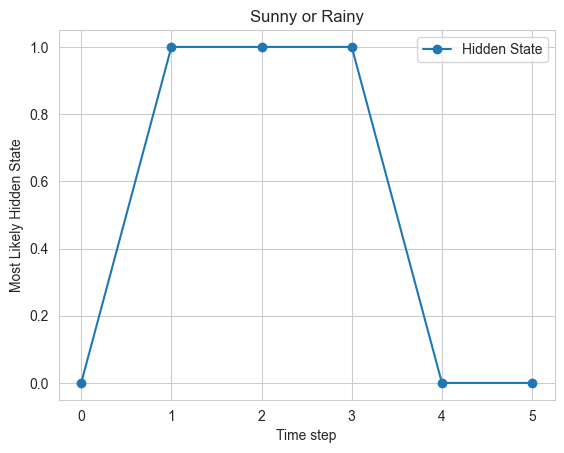

In [17]:
#Plot the results

sns.set_style("whitegrid")
plt.plot(hidden_states, '-o', label="Hidden State")
plt.xlabel('Time step')
plt.ylabel('Most Likely Hidden State')
plt.title("Sunny or Rainy")
plt.legend()
plt.show()

#The plot shows that the model predicts that the weather is mostly sunny, with a few rainy days mixed in.

# Speech recognition example using HMM

## Problem statement: Given a dataset of audio recordings, the task is to recognize the words spoken in the recordings.

In this example, the state space is defined as states, which is a list of 4 possible states representing silence or the presence of one of 3 different words. The observation space is defined as observations, which is a list of 2 possible observations, representing the volume of the speech. The initial state distribution is defined as start_probability, which is an array of probabilities of length 4 representing the probability of each state being the initial state.

The state transition probabilities are defined as transition_probability, which is a 4x4 matrix representing the probability of transitioning from one state to another. The observation likelihoods are defined as emission_probability, which is a 4x2 matrix representing the probability of emitting an observation for each state.

The model is defined using the MultinomialHMM class from hmmlearn library and is fit using the startprob_, transmat_, and emissionprob_ attributes. The sequence of observations is defined as observations_sequence and is an array of length 8, representing the volume of the speech in 8 different time steps.

The predict method of the model object is used to predict the most likely hidden states, given the observations. The result is stored in the hidden_states variable, which is an array of length 8, representing the most likely state for each time step.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from hmmlearn import hmm


states = ["Silence", "Word1", "Word2", "Word3"]
n_states = len(states)

observations = ["Loud", "Soft"]
n_observations = len(observations)

In [19]:
start_probability = np.array([0.8, 0.1, 0.1, 0.0])

transition_probability = np.array([[0.7, 0.2, 0.1, 0.0],
                                    [0.0, 0.6, 0.4, 0.0],
                                    [0.0, 0.0, 0.6, 0.4],
                                    [0.0, 0.0, 0.0, 1.0]])

emission_probability = np.array([[0.7, 0.3],
                                  [0.4, 0.6],
                                  [0.6, 0.4],
                                  [0.3, 0.7]])

In [20]:
model = hmm.CategoricalHMM(n_components=n_states)
model.startprob_ = start_probability
model.transmat_ = transition_probability
model.emissionprob_ = emission_probability

In [21]:
observations_sequence = np.array([0, 1, 0, 0, 1, 1, 0, 1]).reshape(-1, 1)

In [ ]:
hidden_states = model.predict(observations_sequence)
print("Most likely hidden states:", hidden_states)

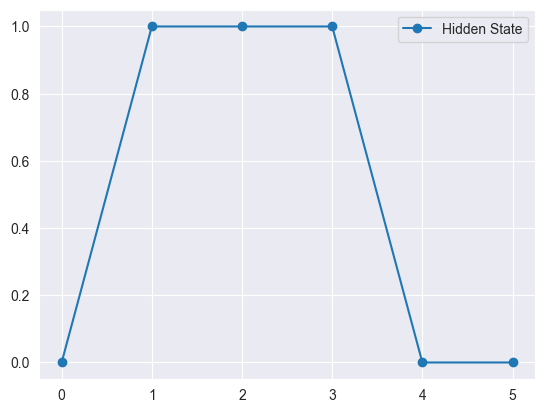

In [22]:
sns.set_style("darkgrid")
plt.plot(hidden_states, '-o', label="Hidden State")
plt.legend()
plt.show()

#